### This challenge is more hands-on and less guided than the previous ones.

The folder src/train contains a collection of face pictures. This is just a sample of the original dataset that contains more pictures.

The file src/labels.csv contains the labels for those images: emotion labels.

The goal of the challenge is to perform a classification of emotions on this train dataset.
===============================================================================
Before doing that, since images are quite big (meaning they have a lot of features),\
you will have to perform PCA in order to reduce the dimension of your dataset.

Perform a PCA and train a classification model, try to reach the best accuracy on a randomly created test set.

### Load the data
- data = list of images
- Features = grey_levels of 350x350 pixels images of faces
- Labels: 

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [30]:
## load the labels in a df
labels_df = pd.read_csv("labels.csv")
labels_df.head()
labels_df.reset_index()

emotions = labels_df['emotion'].unique()
df_emotions = pd.DataFrame(labels_df['emotion'].apply(lambda x: x.lower())) ##df[col].str.lower()
df_emotions['image'] = labels_df['image']

df_emotions.head(10)

list_emotions = df_emotions['emotion'].unique()
print(list_emotions)
### ['anger' 'surprise' 'disgust' 'fear' 'neutral' 'happiness' 'sadness' 'contempt'] - 8 emotions


['anger' 'surprise' 'disgust' 'fear' 'neutral' 'happiness' 'sadness'
 'contempt']


In [31]:
## check the balance of data !!
## check emotion frequencies
df_emotions['emotion'].value_counts()

### !!! pb: jeu de données très unbalanced : que faire dans ce cas ???
## SMOTE avec bruit sur les images des émotions minoritaires ?

neutral      6868
happiness    5696
surprise      368
sadness       268
anger         252
disgust       208
fear           21
contempt        9
Name: emotion, dtype: int64

In [32]:
# filter images on:
# jpg file
# dim_1, dim_2 == 350
# 
import os
directory_in_str = 'images/'
directory = os.fsencode(directory_in_str)
    
#for file in os.listdir(directory):
#    img_face = os.fsdecode(file)
#    if img_face.endswith('.jpg'):
#        print(img_face.size) ---> most are 350x350

### J AI GALERE POUR TROUVER L ASTUCE POUR AVOIR LA VALEUR DE EMOTION ET PAS LA STRUCTURE SERIES DANS y: .squeeze() !!!!
## https://stackoverflow.com/questions/30787901/how-to-get-a-value-from-a-pandas-dataframe-and-not-the-index-and-object-type

WIDTH = 350
HEIGHT = 350

## https://stackoverflow.com/questions/1507084/how-to-check-dimensions-of-all-images-in-a-directory-using-python
from PIL import Image 

"""
avec du REBALANCING sur les classes cibles minoritaires (peut encore être optimisé)
surprise      368 -> *8
sadness       268 -> *8
anger         252 -> *8
disgust       208 -> *9
fear           21 -> *100
contempt        9 -> *100

- risqué: dédoubler les points les + rares
"""

rebalancing_factors = {'surprise': 8, 'sadness': 8, 'anger': 8, 'disgust': 9, 'fear': 100, 'contempt': 100}

X, y = [], []

for dirpath, _, filenames in os.walk(directory_in_str):
    for path_image in filenames:
        image = os.path.abspath(os.path.join(dirpath, path_image))
        with Image.open(image) as img:
            width, height = img.size
            if width == WIDTH and height == HEIGHT:
                img_pixels = np.array(img.getdata()).reshape(350,350)
                #X.append(img_pixels)
                # get the corresponding target in the csv file from the image name
                img_name = img.filename.split('/')[-1]
                emotion = df_emotions[df_emotions['image'] == img_name].squeeze()['emotion']
                if emotion in rebalancing_factors.keys():
                    factor = rebalancing_factors[emotion]
                else:
                    factor = 1
                for fact in range(0, factor):
                    X.append(img_pixels)
                    y.append(emotion)
                ##y.append(df_emotions[df_emotions['image'] == img_name].squeeze()['emotion'])

print(np.array(X).shape) ## 666 images remaining -> 918 après rebalacing
print(np.array(y).shape)

print(type(y))
print(y[0])

### Attention : il faut faire le rebalancing uniqut sur la partie X_train
### pour ne pas avoir de Data leakage


(918, 350, 350)
(918,)
<class 'list'>
neutral


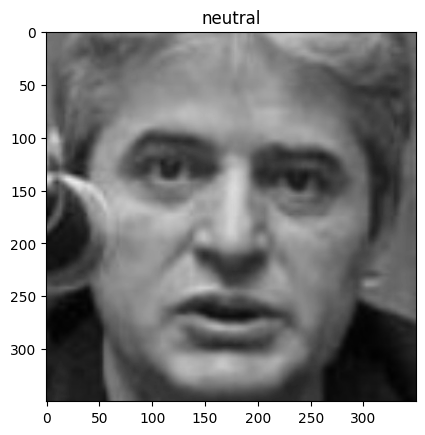

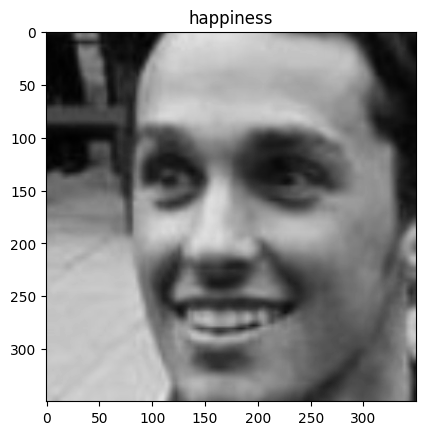

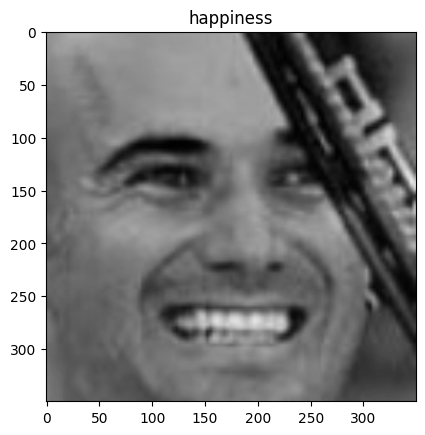

In [5]:
## check 3 images (à randomiser)
for im in range(0,3):
    plt.imshow(X[im], cmap='gray', vmin=0, vmax=255)
    plt.title(f"{y[im]}")
    plt.show()

In [33]:
## convert list to np.array
X_arr = np.array(X).reshape((-1,WIDTH*HEIGHT))

### faire le centrage et le scaling de X avant de faire le PCA

In [34]:
## centrage:
X_centre = X_arr - X_arr.mean(axis=0)

In [35]:
## scaling: Standard Scaler
from sklearn.preprocessing import StandardScaler

X_centre = StandardScaler().fit_transform(X_centre)


## DIM REDUCTION: PCA

In [36]:
from sklearn.decomposition import PCA

## ATTENTION pour la valeur de n_components de PCA : min(n_samples, n_features)=918
#nb_pca_features = 500 #400 ## over 122500 total features = centered grey-level pixels
#pca = PCA(nb_pca_features)

pca = PCA(n_components=0.97)
pca.fit(X_centre)
X_pca = pca.transform(X_centre)

[0.21275566 0.32777264 0.43538546 0.49806959 0.53713267 0.5670084
 0.58828442 0.60859861 0.62636866 0.64329016 0.65854033 0.67217397
 0.68526183 0.69619874 0.70633781 0.71543894 0.72396931 0.73201176
 0.73960223 0.74679566 0.75343968 0.75981542 0.7659817  0.77151312
 0.77688791 0.781882   0.78681691 0.79154332 0.79613329 0.80048172
 0.80468867 0.80878226 0.81257354 0.81629824 0.81988966 0.823214
 0.8264686  0.82966008 0.832693   0.83565634 0.83856061 0.84138585
 0.84406446 0.84670585 0.84923443 0.8517153  0.85412871 0.85643743
 0.85868453 0.86090606 0.86304927 0.86517041 0.86727291 0.86925452
 0.87118539 0.87308441 0.87492828 0.87673672 0.87849423 0.88023302
 0.88193059 0.88359264 0.8851986  0.88674188 0.88828333 0.88978867
 0.89126101 0.89269508 0.89409717 0.89546829 0.89681761 0.89814478
 0.89943732 0.90069405 0.90194115 0.90314653 0.90434209 0.90551278
 0.90665271 0.90776992 0.90888194 0.90998012 0.91104503 0.91209391
 0.91311434 0.91413012 0.91514401 0.91613145 0.91709984 0.9180459

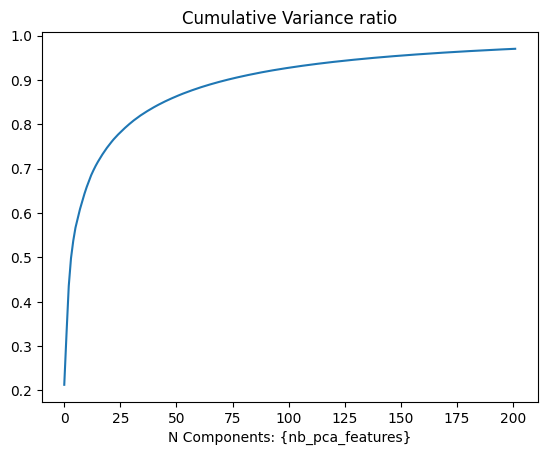

In [37]:
## cumulative explained variance ratio from pca model
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("Cumulative Variance ratio")
plt.xlabel("N Components: {nb_pca_features}")

print(np.cumsum(pca.explained_variance_ratio_))

### CLASSIFICATION MODEL FOR EMOTION PREDICT TRAINED FROM LABELED IMAGES - after PCA

#### 1 - avec un SVC support vector classifier

In [38]:
## PCA Model -> Classification Model: utiliser X_pca et pas le X de départ
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, train_size=0.8, random_state=42) ## Shuffle True par défaut

In [39]:
# SVC Classifier

svc = SVC(kernel='rbf') #c'est le kernel par défaut
svc.fit(X_train, y_train)

SVC()

In [40]:
# SVC scoring
svc_score = svc.score(X_test, y_test)
print(f'svc_score: {svc_score}') ## 0.84 // NB: 0.68 sans le standard scaling

svc_score: 0.842391304347826


In [ ]:
## voir + tard avec gridSearchCV pour Hyperparams optim

In [41]:
## Fréquences des émotions de y_train
print(pd.DataFrame(y_train).value_counts())

neutral      299
happiness    209
surprise     114
sadness       62
anger         50
dtype: int64


'\nneutral      301\nhappiness    202\nsurprise      16\nanger          7\nsadness        6\n'

In [42]:
## fréquences des émotions de la prédiction sur le jeu de train
y_pred = svc.predict(X_train)
print(type(y_pred))
print(len(y_pred)) # 532 
print(pd.DataFrame(y_pred).value_counts())
# 2 émotions dans la prédiction avec surreprésentation de la classe majoritaire ... :(
"""
avec PCA 400 features (idem avec 500...):
neutral      353
happiness    179
pas cool : 2 emotions sur 5
pas assez d'images pour avoir un modèle capable de reconnaître les émotions minoritaires
"""

<class 'numpy.ndarray'>
734
neutral      336
happiness    172
surprise     114
sadness       62
anger         50
dtype: int64


"\navec PCA 400 features (idem avec 500...):\nneutral      353\nhappiness    179\npas cool : 2 emotions sur 5\npas assez d'images pour avoir un modèle capable de reconnaître les émotions minoritaires\n"

In [44]:
## Fréquences des émotions de y_test
print(pd.DataFrame(y_test).value_counts())

neutral      76
happiness    46
surprise     30
sadness      18
anger        14
dtype: int64


In [43]:
## fréquences des prédictions sur le jeu de test
y_pred = svc.predict(X_test)
print(type(y_pred))
print(len(y_pred)) ##134
pd.DataFrame(y_pred).value_counts()

<class 'numpy.ndarray'>
184


neutral      93
surprise     30
happiness    29
sadness      18
anger        14
dtype: int64

### 2. Classif sur PCA avec régression logistique

In [45]:
from sklearn.linear_model import LogisticRegression

# log reg avec regularisation (C = 0.5)
log_reg = LogisticRegression(max_iter=4000, penalty='l2', tol=10**-3, C=0.9, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(C=0.9, max_iter=4000, random_state=42, tol=0.001)

In [46]:
## LOG REG Scoring
log_reg_score = log_reg.score(X_test, y_test)
print(f'log_reg_score: {log_reg_score}') ## 0.70 : même score que SVC ...

log_reg_score: 0.8206521739130435


In [47]:
from sklearn.metrics import f1_score
## multi-
print(f" F1-score RF sur train: {f1_score(y_train, log_reg.predict(X_train), average='weighted')}")
print(f" F1-score RF sur test: {f1_score(y_test, log_reg.predict(X_test), average='weighted')}")

 F1-score RF sur train: 1.0
 F1-score RF sur test: 0.8179341254525277
